# IML Assignment 1

## Name: Evgeny Bobkunov


## Mail: e.bobkunov@innopolis.university


## Group: SD-03

## Task 1

### 3.1. Linear Regression
#### Data reading

In [2]:
import pandas as pd

df = pd.read_csv("train_1.csv")
# Drop the first column (index column)
df = df.drop(columns=['Unnamed: 0'])

#### Train\validation splitting

In [3]:
from sklearn.model_selection import train_test_split

X = df[['X_1', 'X_2', 'X_3', 'X_4']]  # Features
y = df['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Linear regression model fitting

In [4]:
from sklearn.linear_model import LinearRegression


# Declare and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction by model on the validation set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [5]:
from sklearn import metrics

# Print MSE, RMSE, MAE and R2 score
def print_metrics(y_actual, y_pred):
    mse = metrics.mean_squared_error(y_actual, y_pred)
    rmse = metrics.root_mean_squared_error(y_actual, y_pred)
    mae = metrics.mean_absolute_error(y_actual, y_pred)
    r2 = metrics.r2_score(y_actual, y_pred)
    
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)


print_metrics(y_test, y_pred_lr)

Mean Squared Error (MSE): 4147.212113588417
Root Mean Squared Error (RMSE): 64.39885180333899
Mean Absolute Error (MAE): 56.30688948489628
R-squared (R2) Score: 0.7762015767813707


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [6]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [7]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

#### Tuning the degree hyper-parameter using GridSearch

In [8]:
from sklearn.model_selection import GridSearchCV

degrees = range(2, 6)
param_grid = {'poly__degree': degrees}
search = GridSearchCV(pipeline, param_grid, cv=8, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)


best_degree = search.best_params_['poly__degree']
print(f"Best parameter: {best_degree}")
print(f"Search score: {search.best_score_}")

Best parameter: 4
Search score: -1.3570701208622122


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on the test set using the best model
best_model = search.best_estimator_
y_pred_poly = best_model.predict(X_test)

# Evaluation metrics
def print_metrics(y_actual, y_pred):
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)
    
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)

print_metrics(y_test, y_pred_poly)

Mean Squared Error (MSE): 0.23253644844693727
Root Mean Squared Error (RMSE): 0.4822203318473178
Mean Absolute Error (MAE): 0.3279004904348396
R-squared (R2) Score: 0.9999874515001698


#### Save the model

In [10]:
import pickle 

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

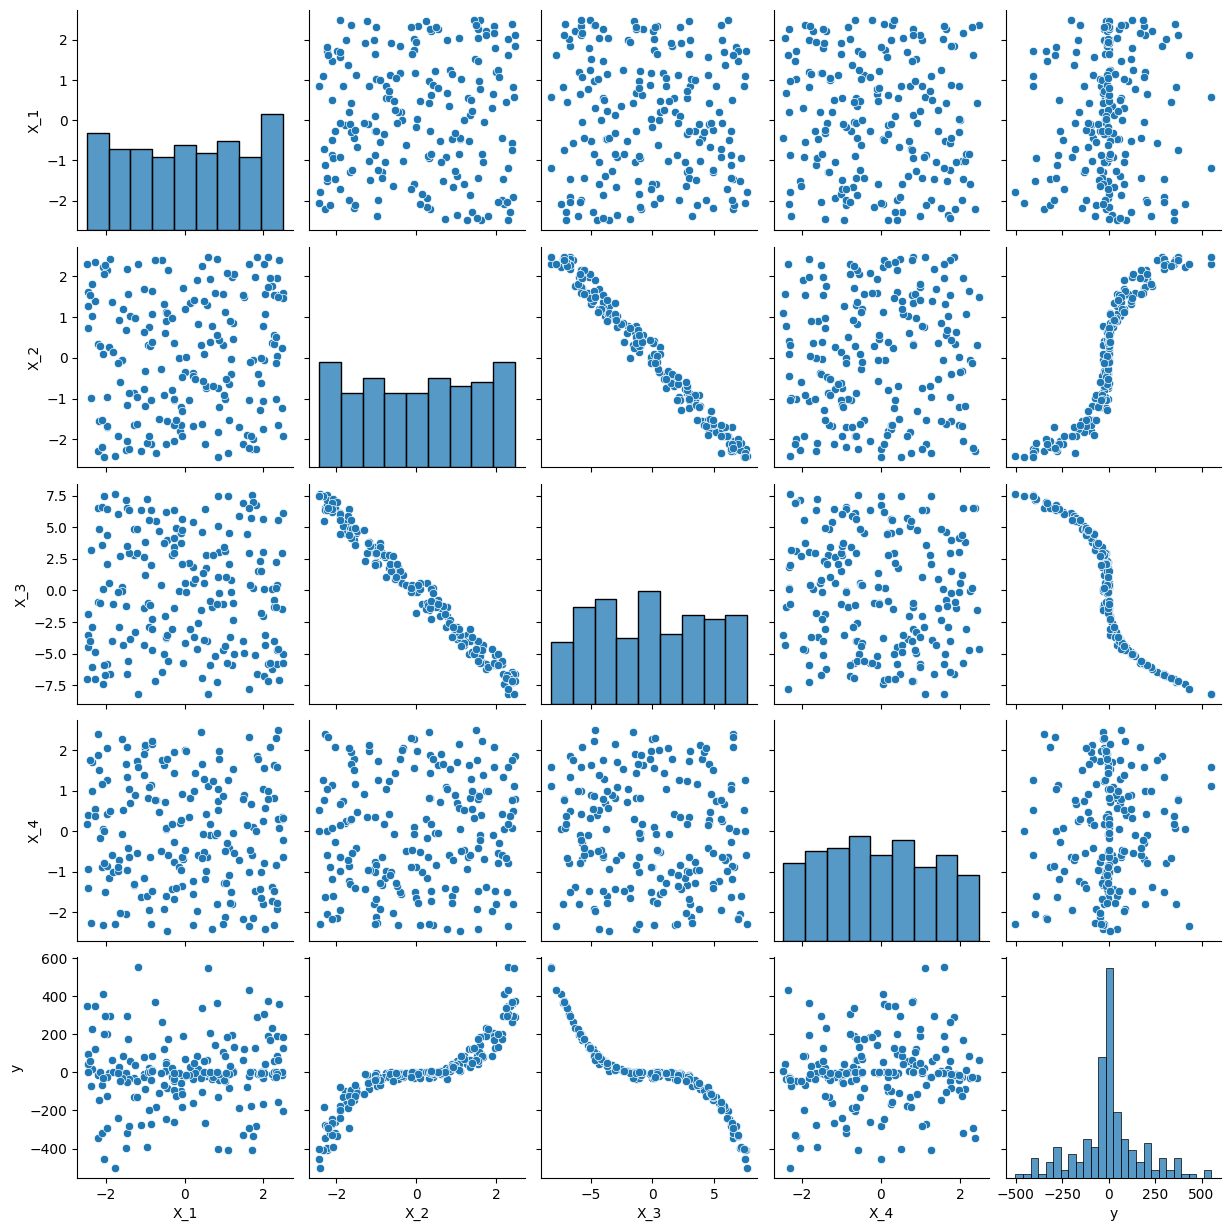

          X_1       X_2       X_3       X_4         y
X_1  1.000000  0.050619 -0.050423 -0.079243  0.067928
X_2  0.050619  1.000000 -0.990740  0.079970  0.893795
X_3 -0.050423 -0.990740  1.000000 -0.095827 -0.911165
X_4 -0.079243  0.079970 -0.095827  1.000000  0.087708
y    0.067928  0.893795 -0.911165  0.087708  1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

correlation_matrix = df.corr()
print(correlation_matrix)


Feature X_2 has a strong positive correlation with target variable y, while feature X_3 has a strong negative correlation with target variable y. The correlation between X_2 and X_3 is also strong, linear and negative. This means that X_2 and X_3 are linearly dependent.

## Task 2

### 4.1 Data processing
#### Loading the dataset

In [82]:
import pandas as pd

df = pd.read_csv('pokemon_modified.csv')

#### Exploring the dataset  and removing 2 redundant features

In [84]:
print(df.head())
print(df.info())

redundant_features = ['name', 'percentage_male']  # These features are unlikely to contribute to classification
df.drop(columns=redundant_features, inplace=True)

   against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0          1.0           1.0             1.0               0.5            0.5   
1          1.0           1.0             1.0               0.5            0.5   
2          1.0           1.0             1.0               0.5            0.5   
3          0.5           1.0             1.0               1.0            0.5   
4          0.5           1.0             1.0               1.0            0.5   

   against_fight  against_fire  against_flying  against_ghost  against_grass  \
0            0.5           2.0             2.0            1.0           0.25   
1            0.5           2.0             2.0            1.0           0.25   
2            0.5           2.0             2.0            1.0           0.25   
3            1.0           0.5             1.0            1.0           0.50   
4            1.0           0.5             1.0            1.0           0.50   

   ...  hp        name  percenta

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [85]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_legendary'])
y = df['is_legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

Check if the dataset is balanced or not and comment on it

In [87]:
print("Class distribution in the training set:")
print(y_train.value_counts(normalize=True))
print("Class distribution in the test set:")
print(y_test.value_counts(normalize=True))

Class distribution in the training set:
is_legendary
0    0.9125
1    0.0875
Name: proportion, dtype: float64
Class distribution in the test set:
is_legendary
0    0.913043
1    0.086957
Name: proportion, dtype: float64


The dataset is imbalanced because the class distribution is skewed towards non-legendary Pokemon.

#### Checking for missing values and imputing the missing values

In [106]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#### Double check that there are no missing values

In [107]:
print(pd.DataFrame(X_train_imputed, columns=X.columns).isnull().sum())

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classification       0
defense              0
experience_growth    0
height_m             0
hp                   0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64


#### Encode categorically

In [111]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_train_imputed_df.columns)

# Step 6: Identify and encode the categorical feature using OneHotEncoder
categorical_feature = ['classification']  # 'classification' is the categorical feature
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')



X_train_encoded = encoder.fit_transform(X_train_imputed_df[categorical_feature])
X_test_encoded = encoder.transform(X_test_imputed_df[categorical_feature])




c:\Users\eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### Scale the data

In [114]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Selecting numeric columns for scaling
numeric_columns = X_train_imputed_df.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the numerical features
X_train_scaled = scaler.fit_transform(X_train_imputed_df[numeric_columns])
X_test_scaled = scaler.transform(X_test_imputed_df[numeric_columns])

# Combine encoded categorical features with scaled numerical features
X_train_final = pd.concat([pd.DataFrame(X_train_scaled, columns=numeric_columns),
                           pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_feature))],
                          axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_scaled, columns=numeric_columns),
                          pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_feature))],
                         axis=1)


ValueError: at least one array or dtype is required

#### <span style="color:red">Correlation matrix</span>

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))

sns.heatmap(X_train_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

NameError: name 'X_train_final' is not defined

<Figure size 3000x3000 with 0 Axes>

### 4.2 Model fitting and Comparison

#### Tuning LR model

In [ ]:
# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score 
# TODO Write your code here
def print_clf_metrics(y_actual, y_pred ):
    pass

In [ ]:
# Specify GridSearchCV as in intruction
# TODO Write your code here
parameters = ...

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declare and train logistic regression inside GridSearchCV with the parameters above
# Set max_iter=1000 in LR constructor
# TODO Write your code here
lr_clf_gs = ...

In [ ]:
print("Tuned Hyperparameters :",)
print("Accuracy :",)

#### Construct a LR with the best params and Evaluate the LR with the best params

In [ ]:
# TODO Write your code here
lr_clf = ...
lr_y_pred = ...

In [ ]:
print_clf_metrics(y_test, lr_y_pred)

#### Print the top 5 most influencing features and the top 5 ignored features

In [ ]:
# TODO Write your code here

#### Tuning KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train knn inside GridSearchCV
# TODO Write your code here
param_grid = ...
knn_clf_gs = ...


print("Tuned Hyperparameters :", )
print("Accuracy :",)

#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [ ]:
# TODO Write your code here
knn_clf = ...
knn_y_pred = ...
print_clf_metrics(y_test, knn_y_pred)

#### Fitting GNB to the data and evaluating on the test dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Declare and train GaussianNB. No hyperparameters tuning 
# TODO Write your code here
gauss_nb_clf = ...
gauss_y_pred = ...

print_clf_metrics(y_test, gauss_y_pred)

#### Which metric is most appropriate for this task and why?

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [ ]:
# TODO Write your code here

## 5. Bonus Task

#### Loading the Dataset

In [ ]:
import pandas as pd

# TODO Write your code here
train_data = ...

test_data = ...

In [ ]:
# Split the data
# TODO Write your code here
X_train, X_test, y_train, y_test = ...
print(X_train, y_train, X_test, y_test)

####  Plot the data using the pairplot in sns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# TODO Write your code here

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [ ]:
# TODO Write your code here
ovr_lr = ...

#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [ ]:
# TODO Write your code here
multi_lr = ...

#### Using gridsearch to tune the C value and multi class

In [ ]:
# TODO Write your code here
params = ...
grid_search_clf = ...

In [ ]:
print("Tuned Hyperparameters :")
print("Accuracy :")

#### Comment on why one multi_class technique was better than the other

#### Create LR with the best params

In [ ]:
# TODO Write your code here
multi_lr = ... 

#### Visualize the decision boundaries

In [ ]:
from mlxtend.plotting import plot_decision_regions
# TODO Write your code here
multi_lr = ...

plot_decision_regions()

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression decision boundary)
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?